# Demo

In [1]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches': 'tight', 'dpi': 110}
%load_ext autoreload
%autoreload 2

Sample text. $\mathcal{P}(x\,|\,\theta)$

In [2]:
import matplotlib.pyplot as plt
import muse_inference
from muse_inference import MuseProblem
import numpy as np

In [3]:
θ_true = 1.

## With numpy

### Scalar

In [4]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (x, z)
    
    def gradθ_logLike(self, x, z, θ):
        return np.sum(z**2)/(2*np.exp(θ)) - self.N/2
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        logLike = -(np.sum((x - z)**2) + np.sum(z**2) / np.exp(θ) + 512*θ) / 2
        gradz_logLike = x - z * (1 + np.exp(-θ))
        return (logLike, gradz_logLike)
    
    def grad_hess_θ_logPrior(self, θ):
        return (-θ/(3**2), -1/3**2)
    

In [5]:
prob = NumpyFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [6]:
result = prob.solve(0, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  8%|▊         | 77/1010 [00:00<00:01, 761.95it/s]

 15%|█▌        | 154/1010 [00:00<00:01, 676.43it/s]

 22%|██▏       | 226/1010 [00:00<00:01, 694.73it/s]

 30%|███       | 308/1010 [00:00<00:00, 739.27it/s]

 39%|███▉      | 392/1010 [00:00<00:00, 773.75it/s]

 47%|████▋     | 476/1010 [00:00<00:00, 794.98it/s]

 55%|█████▌    | 557/1010 [00:00<00:00, 797.54it/s]

 63%|██████▎   | 637/1010 [00:00<00:00, 779.40it/s]

 71%|███████▏  | 722/1010 [00:00<00:00, 798.99it/s]

 80%|████████  | 809/1010 [00:01<00:00, 809.86it/s]

 89%|████████▊ | 896/1010 [00:01<00:00, 825.86it/s]

100%|██████████| 1010/1010 [00:01<00:00, 868.40it/s]

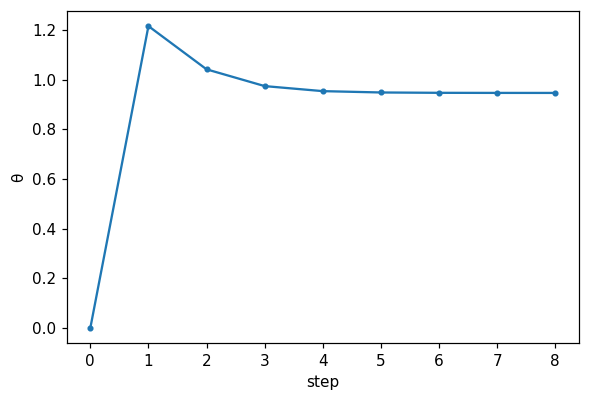

In [7]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [8]:
class NumpyFunnelMuseProblem(MuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N
    
    def sample_x_z(self, rng, θ):
        (θ1, θ2) = θ
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ((x1,x2), (z1,z2))
    
    def gradθ_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        return (np.sum(z1**2)/(2*np.exp(θ1)) - self.N/2, np.sum(z2**2)/(2*np.exp(θ2)) - self.N/2)
    
    def logLike_and_gradz_logLike(self, x, z, θ):
        (θ1, θ2) = θ
        (x1, x2) = x
        (z1, z2) = z
        logLike = -(np.sum((x1 - z1)**2) + np.sum(z1**2) / np.exp(θ1) + 512*θ1) / 2 -(np.sum((x2 - z2)**2) + np.sum(z2**2) / np.exp(θ2) + 512*θ2) / 2
        gradz_logLike = (x1 - z1 * (1 + np.exp(-θ1)), x2 - z2 * (1 + np.exp(-θ2)))
        return (logLike, gradz_logLike)
    
    def gradθ_and_hessθ_logPrior(self, θ):
        (θ1, θ2) = θ
        g = (-θ1/(3**2), -θ2/(3**2))
        H = ((-1/3**2, 0),
              (0,      -1/3**2))
        return g, H

In [9]:
prob = NumpyFunnelMuseProblem(2048)
θ = (-1., 5.)
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [10]:
result = prob.solve(θ, α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  1%|          | 9/1010 [00:00<00:11, 85.03it/s]

  2%|▏         | 22/1010 [00:00<00:08, 110.58it/s]

  3%|▎         | 35/1010 [00:00<00:08, 116.51it/s]

  5%|▍         | 47/1010 [00:00<00:08, 117.30it/s]

  6%|▌         | 61/1010 [00:00<00:07, 122.67it/s]

  7%|▋         | 74/1010 [00:00<00:08, 110.52it/s]

  9%|▊         | 87/1010 [00:00<00:08, 115.23it/s]

 10%|▉         | 100/1010 [00:00<00:07, 118.94it/s]

 11%|█         | 113/1010 [00:00<00:08, 111.52it/s]

 12%|█▏        | 125/1010 [00:01<00:08, 104.93it/s]

 14%|█▎        | 137/1010 [00:01<00:08, 108.16it/s]

 15%|█▍        | 149/1010 [00:01<00:07, 109.72it/s]

 16%|█▌        | 163/1010 [00:01<00:07, 117.87it/s]

 17%|█▋        | 175/1010 [00:01<00:07, 110.00it/s]

 19%|█▉        | 190/1010 [00:01<00:06, 119.44it/s]

 20%|██        | 203/1010 [00:01<00:07, 114.90it/s]

 21%|██▏       | 215/1010 [00:01<00:07, 111.42it/s]

 23%|██▎       | 229/1010 [00:02<00:07, 111.37it/s]

 24%|██▍       | 245/1010 [00:02<00:06, 123.78it/s]

 26%|██▌       | 261/1010 [00:02<00:05, 131.53it/s]

 27%|██▋       | 277/1010 [00:02<00:05, 137.82it/s]

 29%|██▉       | 293/1010 [00:02<00:05, 125.58it/s]

 30%|███       | 306/1010 [00:02<00:05, 120.23it/s]

 32%|███▏      | 323/1010 [00:02<00:05, 131.02it/s]

 33%|███▎      | 338/1010 [00:02<00:05, 123.68it/s]

 35%|███▌      | 355/1010 [00:02<00:04, 134.28it/s]

 37%|███▋      | 372/1010 [00:03<00:04, 141.90it/s]

 38%|███▊      | 387/1010 [00:03<00:04, 132.65it/s]

 40%|███▉      | 401/1010 [00:03<00:04, 123.95it/s]

 41%|████      | 414/1010 [00:03<00:04, 123.14it/s]

 43%|████▎     | 431/1010 [00:03<00:04, 135.18it/s]

 44%|████▍     | 448/1010 [00:03<00:03, 144.33it/s]

 46%|████▌     | 463/1010 [00:03<00:04, 135.36it/s]

 48%|████▊     | 480/1010 [00:03<00:03, 142.95it/s]

 49%|████▉     | 497/1010 [00:03<00:03, 149.42it/s]

 51%|█████     | 513/1010 [00:04<00:03, 130.37it/s]

 52%|█████▏    | 530/1010 [00:04<00:03, 139.98it/s]

 54%|█████▍    | 545/1010 [00:04<00:03, 130.77it/s]

 56%|█████▌    | 562/1010 [00:04<00:03, 139.48it/s]

 57%|█████▋    | 577/1010 [00:04<00:03, 129.18it/s]

 59%|█████▉    | 594/1010 [00:04<00:03, 137.91it/s]

 60%|██████    | 609/1010 [00:04<00:03, 132.54it/s]

 62%|██████▏   | 626/1010 [00:04<00:02, 141.52it/s]

 63%|██████▎   | 641/1010 [00:05<00:02, 134.37it/s]

 65%|██████▌   | 658/1010 [00:05<00:02, 143.48it/s]

 67%|██████▋   | 676/1010 [00:05<00:02, 152.01it/s]

 69%|██████▊   | 692/1010 [00:05<00:02, 140.65it/s]

 70%|███████   | 708/1010 [00:05<00:02, 137.32it/s]

 71%|███████▏  | 722/1010 [00:05<00:02, 130.35it/s]

 73%|███████▎  | 739/1010 [00:05<00:02, 124.58it/s]

 75%|███████▍  | 757/1010 [00:05<00:01, 136.81it/s]

 77%|███████▋  | 775/1010 [00:06<00:01, 146.81it/s]

 79%|███████▊  | 793/1010 [00:06<00:01, 153.87it/s]

 80%|████████  | 809/1010 [00:06<00:01, 128.01it/s]

 82%|████████▏ | 826/1010 [00:06<00:01, 136.49it/s]

 83%|████████▎ | 843/1010 [00:06<00:01, 144.51it/s]

 85%|████████▌ | 859/1010 [00:06<00:01, 134.04it/s]

 87%|████████▋ | 876/1010 [00:06<00:00, 142.19it/s]

 88%|████████▊ | 891/1010 [00:06<00:00, 134.33it/s]

 90%|████████▉ | 908/1010 [00:06<00:00, 142.67it/s]

 91%|█████████▏| 923/1010 [00:07<00:00, 123.28it/s]

 93%|█████████▎| 940/1010 [00:07<00:00, 134.85it/s]

 95%|█████████▍| 957/1010 [00:07<00:00, 143.20it/s]

 96%|█████████▋| 973/1010 [00:07<00:00, 133.42it/s]

 98%|█████████▊| 989/1010 [00:07<00:00, 139.83it/s]

100%|█████████▉| 1006/1010 [00:07<00:00, 147.03it/s]

100%|██████████| 1010/1010 [00:07<00:00, 130.86it/s]

In [11]:
result.history[-1]["θ"]

(-1.062943491137549, 4.979763958528233)

## With Jax

In [12]:
import jax
import jax.numpy as jnp
from muse_inference.jax import JittedJaxMuseProblem, JaxMuseProblem

### Scalar

In [13]:
class JaxFunnelMuseProblem(JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        z = rng.randn(self.N) * np.exp(θ/2)
        x = z + rng.randn(self.N)
        return (jnp.array(x), jnp.array(z))

    def logLike(self, x, z, θ):
        return -(jnp.sum((x - z)**2) + jnp.sum(z**2) / jnp.exp(θ) + 512*θ) / 2
    
    def logPrior(self, θ):
        return -θ**2 / (2*3**2)

In [14]:
prob = JaxFunnelMuseProblem(512)
rng = np.random.RandomState(0)
(x, z) = prob.sample_x_z(rng, θ_true)
prob.x = x

In [15]:
result = prob.solve(0., α=0.7, rng=np.random.RandomState(3), gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<40:00,  2.38s/it]

 10%|█         | 102/1010 [00:05<00:39, 23.25it/s]

 20%|██        | 203/1010 [00:05<00:16, 50.29it/s]

 30%|███       | 304/1010 [00:05<00:08, 88.08it/s]

 40%|████      | 405/1010 [00:05<00:04, 136.64it/s]

 50%|█████     | 506/1010 [00:05<00:02, 196.29it/s]

 60%|██████    | 607/1010 [00:05<00:01, 263.14it/s]

 70%|███████   | 708/1010 [00:06<00:00, 342.78it/s]

 80%|████████  | 809/1010 [00:06<00:00, 426.48it/s]

100%|██████████| 1010/1010 [00:06<00:00, 671.06it/s]

100%|██████████| 1010/1010 [00:06<00:00, 161.28it/s]

In [16]:
[h["θ"] for h in result.history]

[0.0,
 DeviceArray(1.2127963, dtype=float32),
 DeviceArray(1.0396036, dtype=float32),
 DeviceArray(0.97261435, dtype=float32),
 DeviceArray(0.952539, dtype=float32),
 DeviceArray(0.94721234, dtype=float32),
 DeviceArray(0.94585395, dtype=float32),
 DeviceArray(0.94551116, dtype=float32),
 DeviceArray(0.94543195, dtype=float32)]

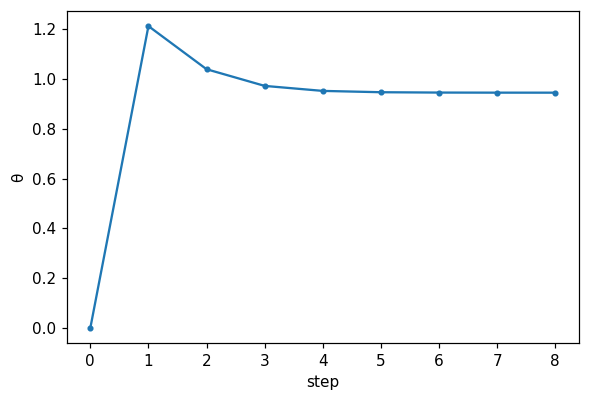

In [17]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [18]:
class JaxFunnelMuseProblem(muse_inference.jax.JittedJaxMuseProblem):
    
    def __init__(self, N):
        super().__init__()
        self.N = N

    def sample_x_z(self, rng, θ):
        (θ1, θ2) = (θ["θ1"], θ["θ2"])
        z1 = rng.randn(self.N) * np.exp(θ1/2)
        z2 = rng.randn(self.N) * np.exp(θ2/2)        
        x1 = z1 + rng.randn(self.N)
        x2 = z2 + rng.randn(self.N)        
        return ({"x1":x1, "x2":x2}, {"z1":z1, "z2":z2})

    def logLike(self, x, z, θ):
        return (
            -(jnp.sum((x["x1"] - z["z1"])**2) + jnp.sum(z["z1"]**2) / jnp.exp(θ["θ1"]) + 512*θ["θ1"]) / 2
            -(jnp.sum((x["x2"] - z["z2"])**2) + jnp.sum(z["z2"]**2) / jnp.exp(θ["θ2"]) + 512*θ["θ2"]) / 2
        )
    
    def logPrior(self, θ):
        return -θ["θ1"]**2 / (2*3**2) - θ["θ2"]**2 / (2*3**2)

In [19]:
prob = JaxFunnelMuseProblem(512)
θ = {"θ1":1., "θ2":2.}
x, z = prob.sample_x_z(np.random.RandomState(0), θ)
prob.x = x

In [20]:
result = prob.solve(θ, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  0%|          | 1/1010 [00:02<49:52,  2.97s/it]

 10%|█         | 102/1010 [00:06<00:49, 18.27it/s]

 20%|██        | 203/1010 [00:06<00:20, 39.50it/s]

 30%|███       | 304/1010 [00:07<00:10, 69.93it/s]

 40%|████      | 405/1010 [00:07<00:05, 109.93it/s]

 50%|█████     | 506/1010 [00:07<00:03, 160.62it/s]

 60%|██████    | 607/1010 [00:07<00:01, 221.24it/s]

 70%|███████   | 708/1010 [00:07<00:01, 292.62it/s]

100%|██████████| 1010/1010 [00:07<00:00, 612.50it/s]

100%|██████████| 1010/1010 [00:07<00:00, 132.77it/s]

In [21]:
result.θ

{'θ1': DeviceArray(1.0921693, dtype=float32),
 'θ2': DeviceArray(1.9329984, dtype=float32)}

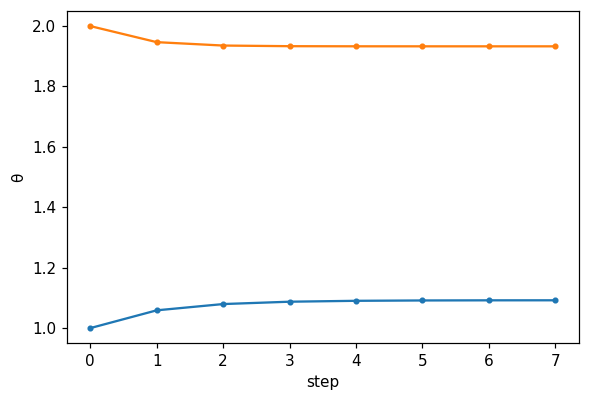

In [22]:
plt.plot([h["θ"]["θ1"] for h in result.history], ".-")
plt.plot([h["θ"]["θ2"] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");

## With PyMC

In [23]:
import sys
import pymc as pm
from muse_inference.pymc import PyMCMuseProblem

### Scalar

In [24]:
# define 
def gen_funnel(x=None, θ=None, rng_seeder=None):
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        θ = θ if θ else pm.Normal("θ", 0, 3)
        z = pm.Normal("z", 0, np.exp(θ / 2), size=512)
        x = pm.Normal("x", z, 1, observed=x)
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
x_obs = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ_true, rng_seeder=rng)).prior.x[0,0]

# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [25]:
result = prob.solve(0., rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  6%|▌         | 61/1010 [00:00<00:01, 606.55it/s]

 12%|█▏        | 122/1010 [00:00<00:02, 318.22it/s]

 17%|█▋        | 175/1010 [00:00<00:03, 263.65it/s]

 20%|██        | 206/1010 [00:00<00:03, 224.40it/s]

 27%|██▋       | 273/1010 [00:00<00:02, 318.87it/s]

 31%|███       | 314/1010 [00:01<00:02, 260.96it/s]

 38%|███▊      | 387/1010 [00:01<00:01, 355.43it/s]

 43%|████▎     | 433/1010 [00:01<00:01, 297.89it/s]

 50%|█████     | 506/1010 [00:01<00:01, 287.10it/s]

 57%|█████▋    | 574/1010 [00:01<00:01, 356.00it/s]

 61%|██████▏   | 619/1010 [00:02<00:01, 303.74it/s]

 68%|██████▊   | 690/1010 [00:02<00:00, 380.03it/s]

 73%|███████▎  | 738/1010 [00:02<00:00, 322.91it/s]

 80%|████████  | 809/1010 [00:02<00:00, 311.14it/s]

 87%|████████▋ | 883/1010 [00:02<00:00, 388.03it/s]

 92%|█████████▏| 931/1010 [00:02<00:00, 330.70it/s]

 99%|█████████▉| 1004/1010 [00:03<00:00, 406.29it/s]

100%|██████████| 1010/1010 [00:03<00:00, 334.09it/s]

In [26]:
[h["θ"] for h in result.history]

[0.0,
 array([1.30363499]),
 array([1.14695937]),
 array([1.07392309]),
 array([1.04549418]),
 array([1.03549045]),
 array([1.03211772]),
 array([1.03099818]),
 array([1.03062854]),
 array([1.0305067])]

/home/runner/.cache/pypoetry/virtualenvs/muse-inference-8TQ0v75b-py3.9/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


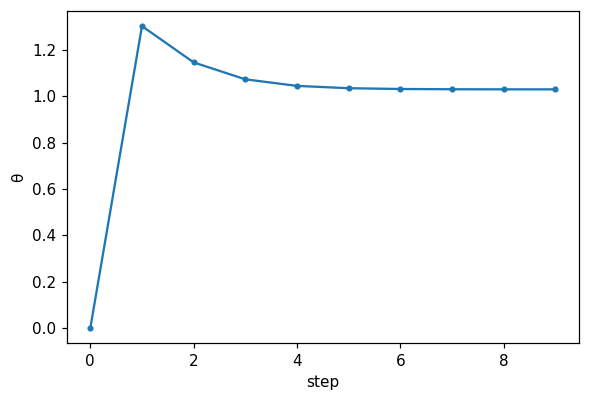

In [27]:
plt.plot([h["θ"] for h in result.history], ".-")
plt.xlabel("step")
plt.ylabel("θ");

### Tuple

In [28]:
# define 
def gen_funnel(x=(None,None), θ=(None,None), rng_seeder=None, N=3):
    (α, β) = θ
    with pm.Model(rng_seeder=rng_seeder) as funnel:
        α = pm.Normal("α", 0, 3) if α is None else α
        β = pm.Normal("β", 0, 3) if β is None else β
        z1 = pm.Normal("z1", 0, np.exp(α / 2), size=N)
        z2 = pm.Normal("z2", 0, np.exp(β / 2), size=N)
        x1 = pm.Normal("x1", z1, 1, observed=x[0])
        x2 = pm.Normal("x2", z2, 1, observed=x[1])
    return funnel
        
# generated simulated data
rng = np.random.RandomState(0)
θ = (-1, 3)
prior = pm.sample_prior_predictive(1, model=gen_funnel(θ=θ, rng_seeder=rng)).prior
x_obs = (prior.x1, prior.x2)

In [29]:
# set up problem
funnel = gen_funnel(x_obs)
prob = PyMCMuseProblem(funnel)

In [30]:
result = prob.solve((0,0), α=0.3, rng=rng, gradz_logLike_atol=1e-4, progress=True, maxsteps=10);

  0%|          | 0/1010 [00:00<?, ?it/s]

  9%|▊         | 88/1010 [00:00<00:01, 874.69it/s]

 17%|█▋        | 176/1010 [00:00<00:03, 266.45it/s]

 22%|██▏       | 223/1010 [00:01<00:04, 177.87it/s]

 29%|██▉       | 296/1010 [00:01<00:02, 256.92it/s]

 34%|███▍      | 343/1010 [00:01<00:03, 182.38it/s]

 40%|████      | 405/1010 [00:02<00:03, 165.94it/s]

 47%|████▋     | 472/1010 [00:02<00:02, 223.57it/s]

 51%|█████     | 512/1010 [00:02<00:03, 165.39it/s]

 58%|█████▊    | 588/1010 [00:02<00:01, 235.30it/s]

 63%|██████▎   | 633/1010 [00:03<00:02, 178.83it/s]

 70%|███████   | 708/1010 [00:03<00:01, 170.91it/s]

 78%|███████▊  | 785/1010 [00:03<00:00, 234.75it/s]

 82%|████████▏ | 828/1010 [00:04<00:00, 182.22it/s]

 90%|████████▉ | 904/1010 [00:04<00:00, 249.58it/s]

 94%|█████████▍| 950/1010 [00:04<00:00, 188.94it/s]

100%|██████████| 1010/1010 [00:04<00:00, 212.05it/s]

In [31]:
[h["θ"] for h in result.history]

[(0, 0),
 (-0.2815542650152184, 6.477243065481221),
 (-0.5141747017993878, 6.1176381059863365),
 (-0.6917951612370189, 5.771196322918962),
 (-0.8175113874843709, 5.439906062050519),
 (-0.9011717981771641, 5.126246152343354),
 (-0.9544622867693776, 4.8331441865861136),
 (-0.9874536523919939, 4.563815442367337),
 (-1.0075234814108809, 4.321445452207079),
 (-1.0196022165166123, 4.10871901590075)]

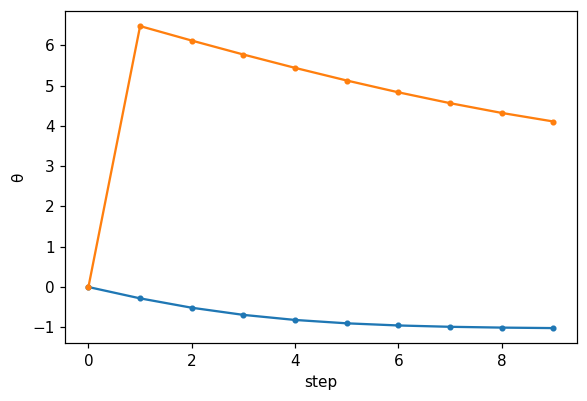

In [32]:
plt.plot([h["θ"][0] for h in result.history], ".-")
plt.plot([h["θ"][1] for h in result.history], ".-")

plt.xlabel("step")
plt.ylabel("θ");